In [3]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import Latex
import glob, os
import pandas as pd
import matplotlib.ticker as mtick
from tikzplotlib import save as savetikz
mk = ['o','s','v','d','x']

#### Para recuperar etiquetas de tiempo de los archivos originales
    git ls-files | xargs -I{} bash -c 'touch "{}" --date=@$(git log -n1 --pretty=format:%ct -- "{}")'

In [4]:
freq1, U1 = [np.arange(10,70,10),np.array([2.2,4.8,7.4,9.95,12.50,15])] 
freq2, U2 = [np.arange(20,70,10),np.array([4.18,6.40,8.50,10.60,12.65])] 
p1 = np.polyfit(freq1,U1,1)
p2 = np.polyfit(freq2,U2,1)
Uf1 = np.poly1d(p1)
Uf2 = np.poly1d(p2)

In [6]:
# Geometry, fluid properties
D,L = [20e-3, 200e-3]
#D,L = [12e-3, 200e-3]
Af = D*L
nu = 1.5e-5
rho = 1.2
#Sensor
precision = 1/160 #Newton
#data files
Long_al_tunel = 120

E = 5e9   #Pascales



<IPython.core.display.Javascript object>


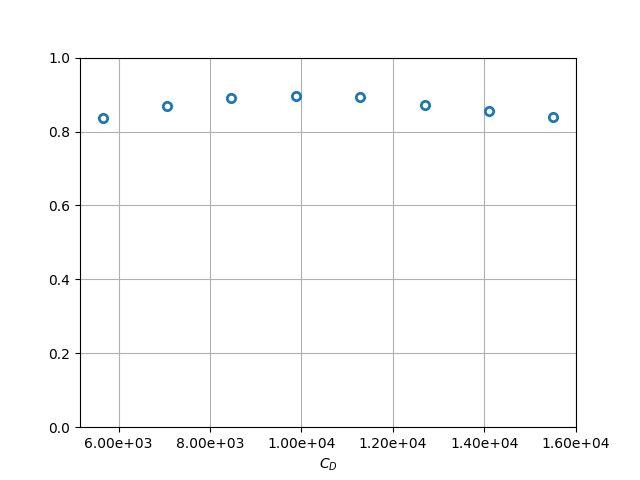

In [7]:
fig,ax = plt.subplots()
ax.ticklabel_format(style='sci',axis='x')  
dirw = 'Dshape_ref_tape/'
files = np.sort(glob.glob(dirw+'fr_*') )
CD, Re, fr_caso = np.zeros((3,len(files)))
for i,file2 in enumerate(files):
    time2,Fx2,Fy2,Fz2,Tx2,Ty2,Tz2 = np.loadtxt(file2,skiprows=1).T
    frec_caso = float(file2[-3:])/10
    veloc_caso = Uf2(frec_caso)
    fileref = glob.glob(dirw+'ref*')
    timei = os.path.getctime(file2)
    times_ref = np.asarray([os.path.getctime(filerefi) for filerefi in fileref])
    index_ref = (np.abs(times_ref-timei)).argmin()
    file1 = fileref[index_ref]
    time1,Fx1,Fy1,Fz1,Tx1,Ty1,Tz1 = np.loadtxt(file1,skiprows=1).T
    CD[i] = 2*np.abs(Fx1.mean()-Fx2.mean()) / (veloc_caso**2*rho*Af)
    Re[i] = veloc_caso * D / nu
    fr_caso[i] = frec_caso

ax.xaxis.set_major_formatter(mtick.FormatStrFormatter('%.2e'))
ax.plot(Re,CD,'o',linestyle='',fillstyle='none',markeredgewidth=2)
ax.grid()
ax.set_ylim([0,1])
ax.set_xlabel('$Re$')
ax.set_xlabel('$C_D$')

Re_D, CD_D = [Re, CD]

<IPython.core.display.Javascript object>


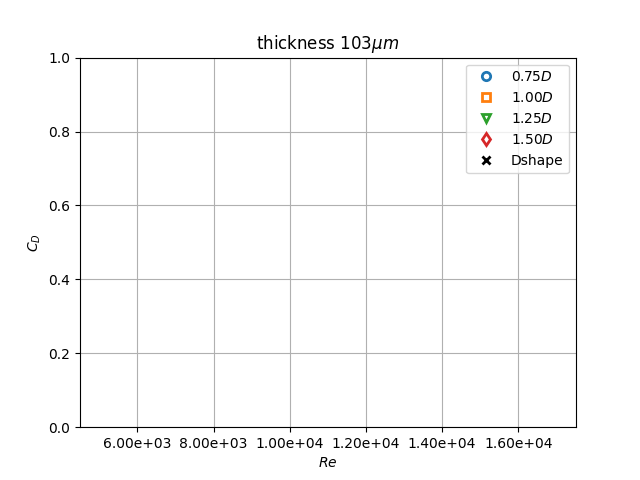

In [8]:
fig,ax = plt.subplots()

dirws = np.sort(glob.glob('Dshape_t*'))
for dirs in np.split(dirws,3):
    lineas =[]
    for k,dirw in enumerate(dirs):
        files = np.sort(glob.glob(dirw+'/fr_*') )
        CD, Re, fr_caso = np.zeros((3,len(files)))
        for i,file2 in enumerate(files):
            time2,Fx2,Fy2,Fz2,Tx2,Ty2,Tz2 = np.loadtxt(file2,skiprows=1).T
            frec_caso = float(file2[-3:])/10
            veloc_caso = Uf2(frec_caso)
            fileref = glob.glob(dirw+'/ref*')
            timei = os.path.getctime(file2)
            times_ref = np.asarray([os.path.getctime(filerefi) for filerefi in fileref])
            index_ref = (np.abs(times_ref-timei)).argmin()
            file1 = fileref[index_ref]
            time1,Fx1,Fy1,Fz1,Tx1,Ty1,Tz1 = np.loadtxt(file1,skiprows=1).T
            CD[i] = 2*np.abs(Fx1.mean()-Fx2.mean()) / (veloc_caso**2*rho*Af)
            Re[i] = veloc_caso * D / nu

            fr_caso[i] = frec_caso

        ax.xaxis.set_major_formatter(mtick.FormatStrFormatter('%.2e'))
        Lcaso = float(dirw.split('_')[-1][1:])/100
        tcaso = float(dirw.split('_')[-2][1:])
        
        lin1,= ax.plot(Re,CD,marker=mk[k],linestyle='',fillstyle='none',
                markeredgewidth=2,label=f'${Lcaso:.2f}D$')
        lineas.append(lin1)
    ax.grid(visible=True)
    ax.set_ylim([0,1])
    ax.set_xlabel('$Re$')
    ax.set_ylabel('$C_D$')
    
    lin2, = ax.plot(Re_D,CD_D,marker='x',linestyle='',fillstyle='none',
                markeredgewidth=2,label=f'Dshape',color='k')
    ax.legend()
    ax.set_title(f'thickness ${tcaso:.0f}\mu m$')
    savetikz(f'tikzs/{tcaso:.0f}_CD.tikz')
    
    [lini.remove() for lini in lineas];lin2.remove()
    plt.gca().set_prop_cycle(None)

In [9]:
tcaso

103.0

In [6]:
ax.grid(visible=True)

<IPython.core.display.Javascript object>


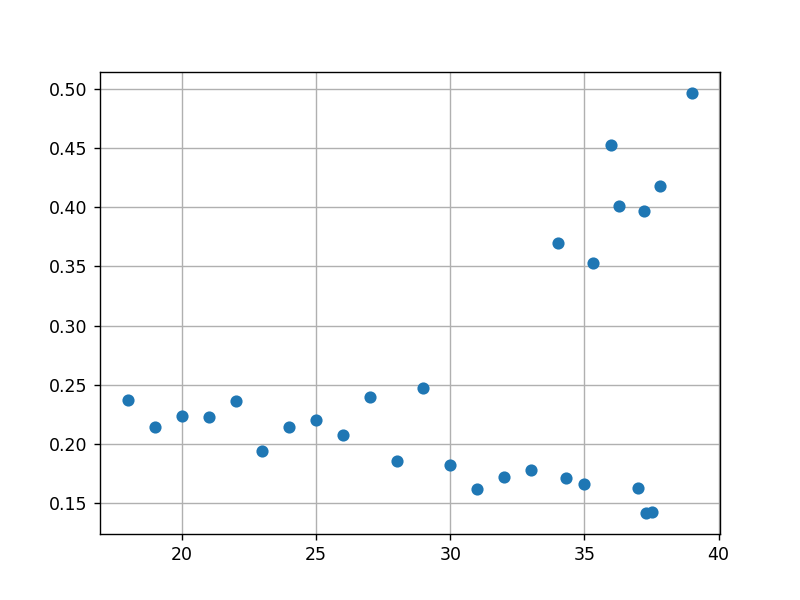

In [27]:
fig,ax = plt.subplots()
dirw = 'Dshape_t028_L150/'
files = np.sort(glob.glob(dirw+'fr_*') )
CD, Re, fr_caso,CL = np.zeros((4,len(files)))
for i,file2 in enumerate(files):
    time2,Fx2,Fy2,Fz2,Tx2,Ty2,Tz2 = np.loadtxt(file2,skiprows=1).T
    frec_caso = float(file2[-3:])/10
    veloc_caso = Uf2(frec_caso)
    fileref = glob.glob(dirw+'ref*')
    timei = os.path.getctime(file2)
    times_ref = np.asarray([os.path.getctime(filerefi) for filerefi in fileref])
    index_ref = (np.abs(times_ref-timei)).argmin()
    file1 = fileref[index_ref]
    time1,Fx1,Fy1,Fz1,Tx1,Ty1,Tz1 = np.loadtxt(file1,skiprows=1).T
    CD[i] = 2*np.abs(Fx1.mean()-Fx2.mean()) / (veloc_caso**2*rho*Af)
    CL[i] = 2*np.abs(Fy2.std()) / (veloc_caso**2*rho*Af)
    Re[i] = veloc_caso * D / nu

    fr_caso[i] = frec_caso
    
ax.plot(fr_caso,CL,'o',linestyle='')
ax.grid()

In [28]:
P = pd.read_excel('pitot1.xlsx',engine="openpyxl");
data_pitot = P.to_numpy();

/home/juan/anaconda3/lib/python3.9/site-packages/openpyxl/styles/stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")
/home/juan/anaconda3/lib/python3.9/site-packages/openpyxl/worksheet/header_footer.py:48: UserWarning: Cannot parse header or footer so it will be ignored
  warn("""Cannot parse header or footer so it will be ignored""")


In [29]:
veloc, num_foto,posicion = data_pitot.T[1:]
posicion = posicion*1e-2  / D

In [30]:

posicion = posicion - posicion[0]
posicion = posicion - posicion[-1]*.52
posicion = posicion / (posicion.max()*0.9)

vecx = np.array([-100,-10,-5,-2])
posicion = np.append(np.append(vecx,posicion),-vecx[::-1])
veloc = np.append(np.append(vecx*0,veloc),-vecx[::-1]*0)/(veloc.max()*.95)

#vecx2 = np.linspace(-0.2,0.2,33)
#posicion = np.append(posicion,vecx2)
#veloc = np.append(veloc,vecx2*0+veloc.max())
index1 = posicion.argsort()
posicion = posicion[index1]
veloc = veloc[index1]

<IPython.core.display.Javascript object>


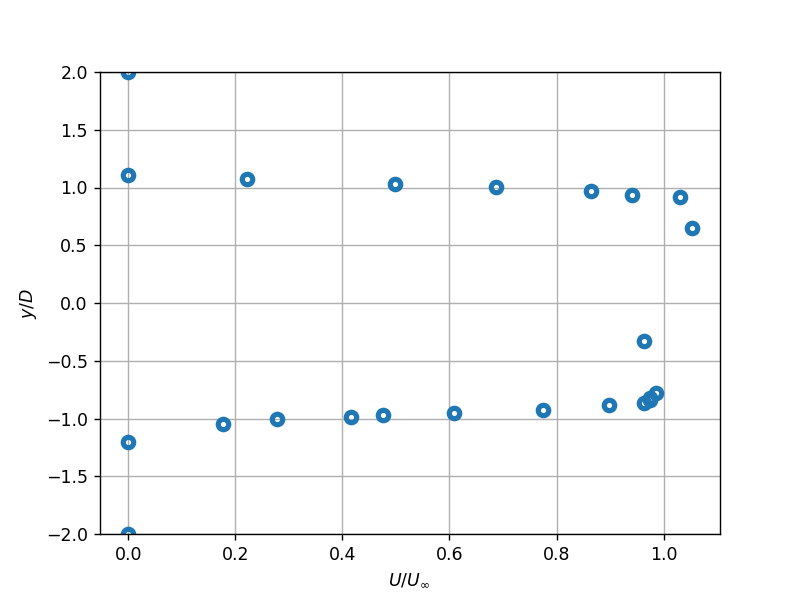

In [45]:
fig,ax = plt.subplots()
ax.plot(veloc,posicion,'o',markeredgewidth=3,linestyle='',fillstyle='none')
ax.set_xlabel('$U/U_\infty$ ')
ax.set_ylabel('$y/D$')
ax.grid()
ax.set_ylim([-2,2]);

In [38]:
from scipy import optimize
def sech_profile(y, a0, a1, a2):
    f = a0 / np.cosh(y * a1) + a2
    return f
def fit_tanh(y,A,a,b):
    #y,A,a,b = [self.y,self.A,self,a,self.b]
    return   1 - A + A * np.tanh(a * (y**2 - b)) 

def sum_sech_profile(y, a0, a1, a2, a3):
    f1 = a0 / np.cosh((y - a2) * a1) + a3
    f2 = a0 / np.cosh((y + a2) * a1) + a3
    return f1 + f2

def U1(y,N):
    if y.any()>0:
        U1 = (1+np.sinh(y*np.sinh(1)**-1)**(2*N))**-1
    else:
        U1 = -(1+np.sinh(y*np.sinh(1)**-1)**(2*N))**-1
    return U1
def nprofile(y,R,N):
    U = 1-R+2*R*U1(y,N)
    return U

#ai, pcov = optimize.curve_fit(sum_sech_profile,posicion, veloc/veloc.max(),bounds=(-0.5, [2, 5, 1, .5]))
#Ni, pcov = optimize.curve_fit(U1,posicion, veloc/veloc.max(),bounds=(2,100))
#ai, pcov = optimize.curve_fit(sech_profile,posicion, veloc/veloc.max(),bounds=(-1,[2,50,20]))
#ai, pcov = optimize.curve_fit(fit_tanh,
#                                posicion,
#                                veloc/veloc.max(),
#                                bounds=(0, [5, 50, 20]))

<IPython.core.display.Javascript object>


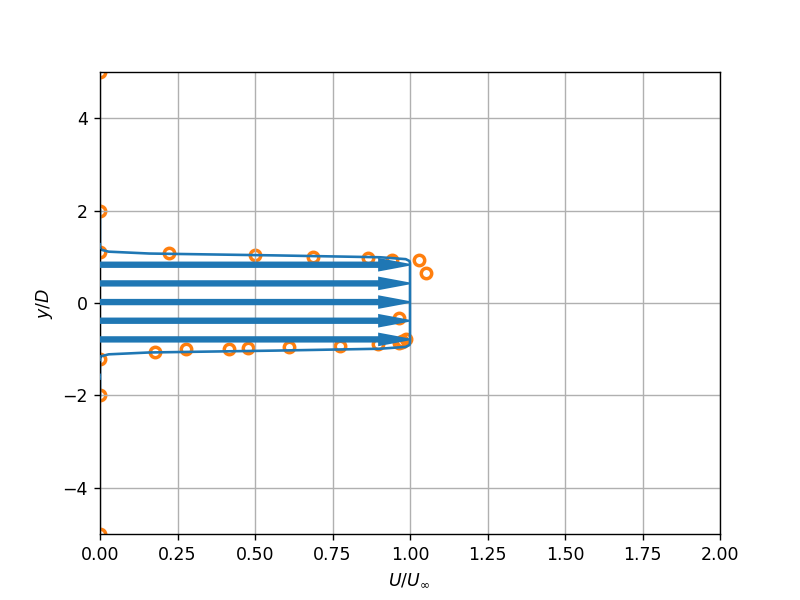

In [74]:
fig,ax = plt.subplots()
xs = np.linspace(-2,2,100)


Uc,Uinf = [.5,0]
R = (Uc-Uinf) / (Uc+Uinf)
Ni = 20
R = 0.75

xsp,xsd,Up = [1,0,9]

#ax.set_ylim([-3,3])
circle1 = plt.Circle((11, 10), 0.5, color='k')

#ax.add_patch(circle1)
#ax.set_aspect('equal')
ax.set_xlabel(r'$U/U_\infty$ ')
ax.set_ylabel('$y/D$')
ax.grid()
#ax.set_aspect('equal')
ax.set_xlim([0,2])
ax.set_ylim([-5,5])

lin2, = ax.plot(U1(xs,Ni),xs+xsd)
for xsi in xs[10:-10:10]:
    #ax.plot([0,U1(xsi,Ni)*10],[xsp*xsi+xsd,xsp*xsi+xsd],color=lin2.get_color(),linewidth=0.5)
    ax.arrow(0,xsi+xsd,U1(xsi,Ni),0,width=0.1,length_includes_head=True,head_width=.25,zorder=10,head_length=.1,color=lin2.get_color())
ax.plot(veloc,posicion,'o',markeredgewidth=2,linestyle='',fillstyle='none',zorder=-10)
savetikz('tikzs/velocity_profile_windtunnel.tikz',extra_axis_parameters=['axis equal'])
